In [4]:
import arch as arch
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file C:\Users\likem\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\likem\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\likem\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [6]:
from pathlib import Path
csvpath = Path('BTCUSD.csv')
btc_df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
btc_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-26,11366.894531,11530.052734,11296.993164,11488.363281,11488.363281,2.246666e+10
2020-08-27,11485.608398,11570.786133,11185.941406,11323.397461,11323.397461,2.324042e+10
2020-08-28,11325.295898,11545.615234,11316.422852,11542.500000,11542.500000,1.980713e+10
2020-08-29,11541.054688,11585.640625,11466.292969,11506.865234,11506.865234,1.748560e+10
2020-08-30,11508.713867,11715.264648,11492.381836,11711.505859,11711.505859,1.976013e+10


<AxesSubplot:xlabel='Date'>

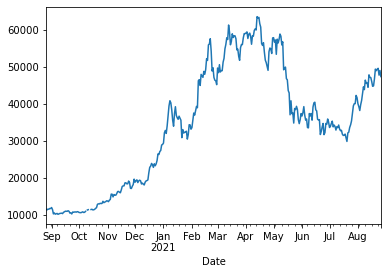

In [8]:
btc_df.Close.plot()

In [9]:
# (Make sure to multiply the pct_change() results by *100)
btc_df['Return'] = btc_df.Close.pct_change() * 100
btc_df['Lagged_Return'] = btc_df['Return'].shift()
btc_df = btc_df.dropna()
btc_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2021-08-22,48869.105469,49471.609375,48199.941406,49321.652344,49321.652344,2.537098e+10,0.850948,-0.878984
2021-08-23,49291.675781,50482.078125,49074.605469,49546.148438,49546.148438,3.430505e+10,0.455167,0.850948
2021-08-24,49562.347656,49878.769531,47687.117188,47706.117188,47706.117188,3.536117e+10,-3.713773,0.455167
2021-08-25,47727.257813,49202.878906,47163.613281,48960.789063,48960.789063,3.264635e+10,2.630002,-3.713773
2021-08-26,49076.324219,49334.746094,46460.628906,47321.683594,47321.683594,3.341791e+10,-3.347792,2.630002


<AxesSubplot:xlabel='Date'>

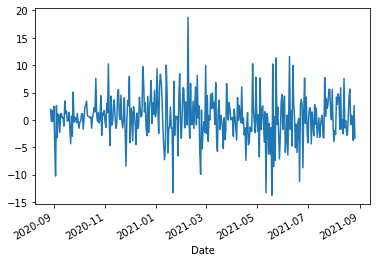

In [10]:
btc_df['Return'].plot()

In [17]:
# Create a train/test split for the data using 2017-2018 for training and 2019 for testing
train = btc_df['2020':'2021']
test = btc_df['2020':'2021']

In [18]:
# Create four DataFrames:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

In [19]:
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [21]:
# Make a prediction of "y" values using just the test dataset
predictions = model.predict(X_test)

In [22]:
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame:
Results = y_test.to_frame()
Results["Predicted Return"] = predictions


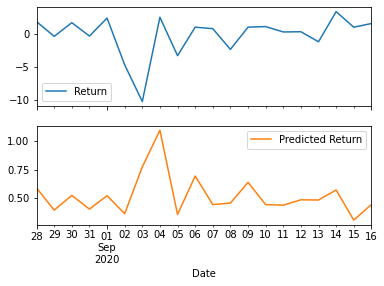

In [24]:
# Plot the first 20 predictions vs the true values
Results[:20].plot(subplots=True)
xlable= 'Date'
ylable='Price'